In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, Normalizer, KBinsDiscretizer, OneHotEncoder
import warnings
from sklearn.decomposition import PCA

In [7]:
datapath = r'C:\Users\bloo404\Desktop\3\SEM 2\MIASC\QORn_Assignment02\Dataset_partial'

column_names = ["Timestamp" , "UID", 'Gas', 'Value']
radon_df = pd.DataFrame()
co2_df = pd.DataFrame()

for filename in os.listdir(datapath):
    file_path = os.path.join(datapath, filename)
    df = pd.read_csv(file_path, header=None)
    df = df.iloc[:, :4] 
    df.columns = column_names[:len(df.columns)] 
    if "RADON" in filename.upper():
        radon_df = pd.concat([radon_df, df], ignore_index=True)
    else:
        co2_df = pd.concat([co2_df, df], ignore_index=True)

display(radon_df)
display(co2_df)

,Timestamp,UID,Gas,Value
0,2019-01-01 00:00:21.899000,000.021.174.106,RADON,151
1,2019-01-01 00:00:23.560000,000.021.160.006,RADON,689
2,2019-01-01 00:00:35.229000,000.021.182.192,RADON,171
3,2019-01-01 00:00:37.225000,000.022.011.031,RADON,878
4,2019-01-01 00:00:39.669000,000.021.251.221,RADON,253
...,...,...,...,...
22584386,2019-12-29 23:59:34.432000,000.021.186.111,RADON,11047
22584387,2019-12-29 23:59:38.842000,000.021.184.048,RADON,743
22584388,2019-12-29 23:59:40.543000,000.021.250.211,RADON,733
22584389,2019-12-29 23:59:46.928000,000.021.206.055,RADON,1063


,Timestamp,UID,Gas,Value
0,2019-01-01 00:00:01.964000,000.021.205.082,CO2,1743
1,2019-01-01 00:00:04.343000,000.022.008.098,CO2,1361
2,2019-01-01 00:00:12.175000,000.021.233.134,CO2,460
3,2019-01-01 00:00:17.444000,000.021.247.081,CO2,802
4,2019-01-01 00:00:18.815000,000.021.183.104,CO2,572
...,...,...,...,...
22622431,2019-12-29 23:59:27.490000,000.021.230.247,CO2,1008
22622432,2019-12-29 23:59:35.984000,000.021.186.111,CO2,3478
22622433,2019-12-29 23:59:40.378000,000.021.184.048,CO2,585
22622434,2019-12-29 23:59:43.367000,000.021.252.071,CO2,2922


In [12]:
def group_by_and_save(df, gas_name):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime
    df['Year'] = df['Timestamp'].dt.year
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.day
    df['Hour'] = df['Timestamp'].dt.hour

    grouped = df.groupby(['Year', 'Month', 'Day', 'Hour', 'UID']).agg({'Value': 'mean'}).reset_index()

    return grouped
    
radon_grouped = group_by_and_save(radon_df, 'radon')
co2_grouped = group_by_and_save(co2_df, 'co2')

In [25]:
def group_by(grouped, gas_name, destination):
    for year, month in grouped.groupby(['Year', 'Month']):
        file_name = f"{gas_name}_{year[1]:02d}_{year[0]}.csv"
        print(file_name)       
        grouped.to_csv(destination + '/' + file_name, index=False)

In [27]:
group_by(radon_grouped,'RADON', 'Dataset_grupat')
group_by(co2_grouped, "CO2", 'Dataset_grupat')

RADON_01_2019.csv
RADON_02_2019.csv
RADON_03_2019.csv
RADON_04_2019.csv
RADON_05_2019.csv
RADON_06_2019.csv
RADON_07_2019.csv
RADON_08_2019.csv
RADON_09_2019.csv
RADON_10_2019.csv
RADON_11_2019.csv
RADON_12_2019.csv
CO2_01_2019.csv
CO2_02_2019.csv
CO2_03_2019.csv
CO2_04_2019.csv
CO2_05_2019.csv
CO2_06_2019.csv
CO2_07_2019.csv
CO2_08_2019.csv
CO2_09_2019.csv
CO2_10_2019.csv
CO2_11_2019.csv
CO2_12_2019.csv


In [38]:
radon_grouped['Gas'] = 'radon'
co2_grouped['Gas'] = 'co2'
union_df = pd.concat([radon_grouped, co2_grouped], axis=0)
union_df.reset_index(drop=True, inplace=True)
display(union_df)

,Year,Month,Day,Hour,UID,Value,Gas
0,2019,1,1,0,000.021.157.133,302.466667,radon
1,2019,1,1,0,000.021.159.213,230.258065,radon
2,2019,1,1,0,000.021.160.006,707.633333,radon
3,2019,1,1,0,000.021.160.139,829.200000,radon
4,2019,1,1,0,000.021.160.145,474.166667,radon
...,...,...,...,...,...,...,...
1509050,2019,12,29,23,000.022.013.205,921.700000,co2
1509051,2019,12,29,23,000.022.018.029,2682.333333,co2
1509052,2019,12,29,23,000.046.190.189,304.666667,co2
1509053,2019,12,29,23,000.046.192.109,215.774194,co2


In [39]:
description = union_df.describe()
print(description)

            Year         Month           Day          Hour         Value
count  1509055.0  1.509055e+06  1.509055e+06  1.509055e+06  1.509055e+06
mean      2019.0  6.384225e+00  1.566464e+01  1.152186e+01  6.106495e+02
std          0.0  3.369849e+00  8.752650e+00  6.921492e+00  6.817111e+02
min       2019.0  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%       2019.0  3.000000e+00  8.000000e+00  6.000000e+00  2.009667e+02
50%       2019.0  6.000000e+00  1.600000e+01  1.200000e+01  4.261333e+02
75%       2019.0  9.000000e+00  2.300000e+01  1.800000e+01  7.675806e+02
max       2019.0  1.200000e+01  3.100000e+01  2.300000e+01  3.351000e+04


In [40]:
head = union_df.head(10000)
tail = union_df.tail(10000)
union_df = pd.concat([head, tail], ignore_index=True)
display(union_df)

,Year,Month,Day,Hour,UID,Value,Gas
0,2019,1,1,0,000.021.157.133,302.466667,radon
1,2019,1,1,0,000.021.159.213,230.258065,radon
2,2019,1,1,0,000.021.160.006,707.633333,radon
3,2019,1,1,0,000.021.160.139,829.200000,radon
4,2019,1,1,0,000.021.160.145,474.166667,radon
...,...,...,...,...,...,...,...
19995,2019,12,29,23,000.022.013.205,921.700000,co2
19996,2019,12,29,23,000.022.018.029,2682.333333,co2
19997,2019,12,29,23,000.046.190.189,304.666667,co2
19998,2019,12,29,23,000.046.192.109,215.774194,co2


In [41]:
numeric_columns = union_df.select_dtypes(include=['number']).columns
union_df[numeric_columns] = union_df[numeric_columns].fillna(union_df[numeric_columns].mean())

In [42]:
display(union_df)

,Year,Month,Day,Hour,UID,Value,Gas
0,2019,1,1,0,000.021.157.133,302.466667,radon
1,2019,1,1,0,000.021.159.213,230.258065,radon
2,2019,1,1,0,000.021.160.006,707.633333,radon
3,2019,1,1,0,000.021.160.139,829.200000,radon
4,2019,1,1,0,000.021.160.145,474.166667,radon
...,...,...,...,...,...,...,...
19995,2019,12,29,23,000.022.013.205,921.700000,co2
19996,2019,12,29,23,000.022.018.029,2682.333333,co2
19997,2019,12,29,23,000.046.190.189,304.666667,co2
19998,2019,12,29,23,000.046.192.109,215.774194,co2


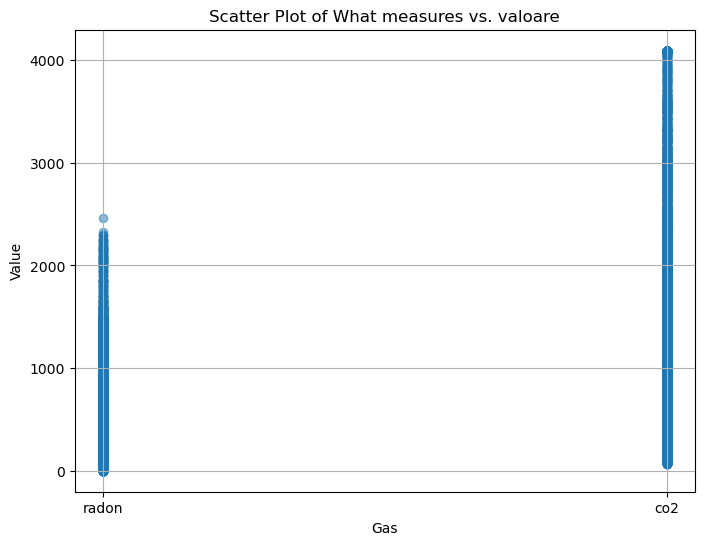

In [43]:
plt.figure(figsize=(8, 6)) 
plt.scatter(union_df['Gas'], union_df['Value'], alpha=0.5)
plt.xlabel('Gas')
plt.ylabel('Value')
plt.title('Scatter Plot of What measures vs. valoare')
plt.grid(True)
plt.show()

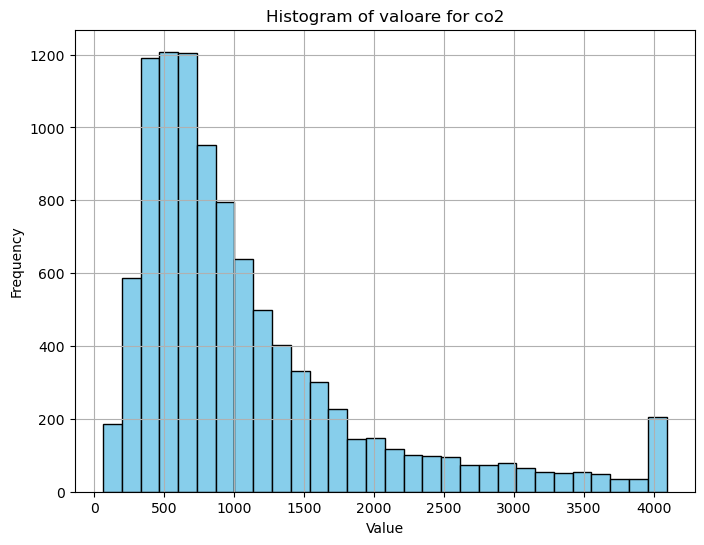

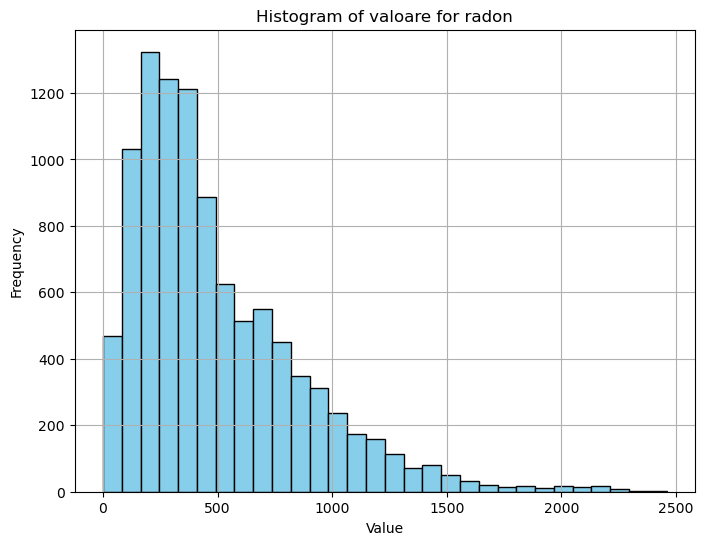

In [44]:
selected_columns = ["Gas", "Value"]

selected_df = union_df[selected_columns]

for measure, group_df in selected_df.groupby("Gas"):
    plt.figure(figsize=(8, 6))
    plt.hist(group_df["Value"], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of valoare for {measure}')
    plt.xlabel("Value")
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [45]:
numeric_columns = union_df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

union_df[numeric_columns] = scaler.fit_transform(union_df[numeric_columns])

print(union_df)

       Year  Month       Day      Hour              UID     Value    Gas
0       0.0   -1.0 -1.222852 -1.675681  000.021.157.133 -0.680479  radon
1       0.0   -1.0 -1.222852 -1.675681  000.021.159.213 -0.779981  radon
2       0.0   -1.0 -1.222852 -1.675681  000.021.160.006 -0.122168  radon
3       0.0   -1.0 -1.222852 -1.675681  000.021.160.139  0.045349  radon
4       0.0   -1.0 -1.222852 -1.675681  000.021.160.145 -0.443880  radon
...     ...    ...       ...       ...              ...       ...    ...
19995   0.0    1.0  1.187218  1.630998  000.022.013.205  0.172812    co2
19996   0.0    1.0  1.187218  1.630998  000.022.018.029  2.598929    co2
19997   0.0    1.0  1.187218  1.630998  000.046.190.189 -0.677448    co2
19998   0.0    1.0  1.187218  1.630998  000.046.192.109 -0.799940    co2
19999   0.0    1.0  1.187218  1.630998  000.046.195.015 -0.269566    co2

[20000 rows x 7 columns]


In [46]:
warnings.filterwarnings("ignore", category=UserWarning)

normalizer_L1 = Normalizer(norm='l1')

union_df_L1 = union_df.copy()
union_df_L1[numeric_columns] = normalizer_L1.transform(union_df_L1[numeric_columns])

union_df_L1.columns = union_df.columns

print("Normalized with L1:")
print(union_df_L1.head())

Normalized with L1:
   Year     Month       Day      Hour              UID     Value    Gas
0   0.0 -0.218388 -0.267056 -0.365948  000.021.157.133 -0.148608  radon
1   0.0 -0.213743 -0.261376 -0.358165  000.021.159.213 -0.166716  radon
2   0.0 -0.248713 -0.304139 -0.416763  000.021.160.006 -0.030385  radon
3   0.0 -0.253557 -0.310063 -0.424881  000.021.160.139  0.011499  radon
4   0.0 -0.230287 -0.281607 -0.385887  000.021.160.145 -0.102220  radon


In [47]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

union_df_L1[numeric_columns] = discretizer.fit_transform(union_df_L1[numeric_columns])

print(union_df_L1)

       Year  Month  Day  Hour              UID  Value    Gas
0       0.0    2.0  2.0   1.0  000.021.157.133    1.0  radon
1       0.0    2.0  2.0   1.0  000.021.159.213    1.0  radon
2       0.0    2.0  2.0   0.0  000.021.160.006    3.0  radon
3       0.0    2.0  2.0   0.0  000.021.160.139    3.0  radon
4       0.0    2.0  2.0   1.0  000.021.160.145    2.0  radon
...     ...    ...  ...   ...              ...    ...    ...
19995   0.0    7.0  7.0   9.0  000.022.013.205    3.0    co2
19996   0.0    6.0  6.0   7.0  000.022.018.029    7.0    co2
19997   0.0    6.0  7.0   8.0  000.046.190.189    1.0    co2
19998   0.0    6.0  7.0   8.0  000.046.192.109    1.0    co2
19999   0.0    7.0  7.0   9.0  000.046.195.015    2.0    co2

[20000 rows x 7 columns]


In [52]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(union_df_L1[['Gas']])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names(['Gas']))

union_df_encoded = pd.concat([union_df_L1.drop(columns=['Gas']), onehot_encoded_df], axis=1)

print(union_df_encoded)

       Year  Month  Day  Hour              UID  Value  Gas_co2  Gas_radon
0       0.0    2.0  2.0   1.0  000.021.157.133    1.0      0.0        1.0
1       0.0    2.0  2.0   1.0  000.021.159.213    1.0      0.0        1.0
2       0.0    2.0  2.0   0.0  000.021.160.006    3.0      0.0        1.0
3       0.0    2.0  2.0   0.0  000.021.160.139    3.0      0.0        1.0
4       0.0    2.0  2.0   1.0  000.021.160.145    2.0      0.0        1.0
...     ...    ...  ...   ...              ...    ...      ...        ...
19995   0.0    7.0  7.0   9.0  000.022.013.205    3.0      1.0        0.0
19996   0.0    6.0  6.0   7.0  000.022.018.029    7.0      1.0        0.0
19997   0.0    6.0  7.0   8.0  000.046.190.189    1.0      1.0        0.0
19998   0.0    6.0  7.0   8.0  000.046.192.109    1.0      1.0        0.0
19999   0.0    7.0  7.0   9.0  000.046.195.015    2.0      1.0        0.0

[20000 rows x 8 columns]


C:\Users\bloo404\anaconda3\envs\AIClimate\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [54]:
selected_features = union_df_encoded[['Year','Month','Day','Hour', 'UID', 'Value', 'Gas_co2', 'Gas_radon']]
display(selected_features)

,Year,Month,Year,Day,Hour,UID,Value,Gas_co2,Gas_radon
0,0.0,2.0,0.0,2.0,1.0,000.021.157.133,1.0,0.0,1.0
1,0.0,2.0,0.0,2.0,1.0,000.021.159.213,1.0,0.0,1.0
2,0.0,2.0,0.0,2.0,0.0,000.021.160.006,3.0,0.0,1.0
3,0.0,2.0,0.0,2.0,0.0,000.021.160.139,3.0,0.0,1.0
4,0.0,2.0,0.0,2.0,1.0,000.021.160.145,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
19995,0.0,7.0,0.0,7.0,9.0,000.022.013.205,3.0,1.0,0.0
19996,0.0,6.0,0.0,6.0,7.0,000.022.018.029,7.0,1.0,0.0
19997,0.0,6.0,0.0,7.0,8.0,000.046.190.189,1.0,1.0,0.0
19998,0.0,6.0,0.0,7.0,8.0,000.046.192.109,1.0,1.0,0.0


In [55]:
display(selected_features)

,Year,Month,Year,Day,Hour,UID,Value,Gas_co2,Gas_radon
0,0.0,2.0,0.0,2.0,1.0,000.021.157.133,1.0,0.0,1.0
1,0.0,2.0,0.0,2.0,1.0,000.021.159.213,1.0,0.0,1.0
2,0.0,2.0,0.0,2.0,0.0,000.021.160.006,3.0,0.0,1.0
3,0.0,2.0,0.0,2.0,0.0,000.021.160.139,3.0,0.0,1.0
4,0.0,2.0,0.0,2.0,1.0,000.021.160.145,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
19995,0.0,7.0,0.0,7.0,9.0,000.022.013.205,3.0,1.0,0.0
19996,0.0,6.0,0.0,6.0,7.0,000.022.018.029,7.0,1.0,0.0
19997,0.0,6.0,0.0,7.0,8.0,000.046.190.189,1.0,1.0,0.0
19998,0.0,6.0,0.0,7.0,8.0,000.046.192.109,1.0,1.0,0.0


In [56]:
# These are not appliable to us

selected_features_numeric = selected_features.select_dtypes(include=['number'])

scaler = StandardScaler()
selected_features_scaled = scaler.fit_transform(selected_features_numeric)

display(selected_features_scaled)

array([[ 0.        , -0.85423209,  0.        , ..., -0.82464886,
        -1.        ,  1.        ],
       [ 0.        , -0.85423209,  0.        , ..., -0.82464886,
        -1.        ,  1.        ],
       [ 0.        , -0.85423209,  0.        , ...,  0.19117876,
        -1.        ,  1.        ],
       ...,
       [ 0.        ,  0.5539395 ,  0.        , ..., -0.82464886,
         1.        , -1.        ],
       [ 0.        ,  0.5539395 ,  0.        , ..., -0.82464886,
         1.        , -1.        ],
       [ 0.        ,  0.90598239,  0.        , ..., -0.31673505,
         1.        , -1.        ]])

       Principal Component 1  Principal Component 2
0                  -2.065647               1.103653
1                  -2.065647               1.103653
2                  -1.836654               1.721074
3                  -1.836654               1.721074
4                  -1.943701               1.234521
...                      ...                    ...
19995               1.944692              -1.564211
19996               2.064420              -0.314032
19997               1.516175              -1.460680
19998               1.516175              -1.460680
19999               1.822746              -1.695078

[20000 rows x 2 columns]


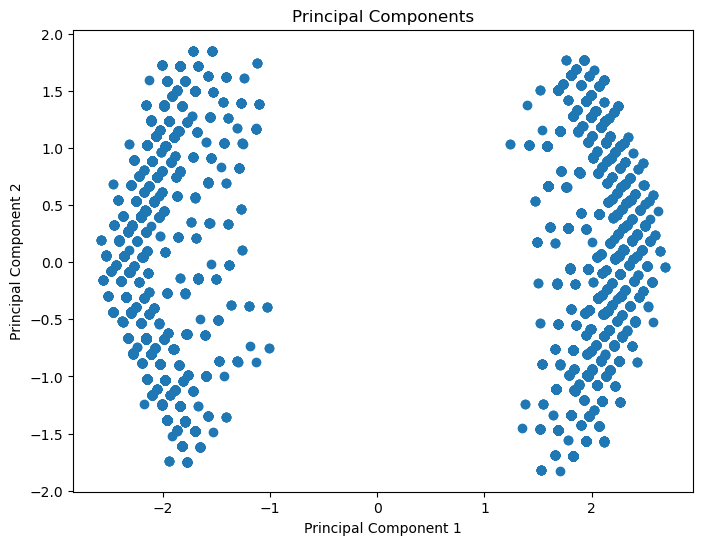

In [57]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(selected_features_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

print(principal_df)

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components')
plt.show()